In [41]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import torch

In [38]:
img = np.array(Image.open("data/train/NIR/imgset0594/LR011.png"))

(128, 128)


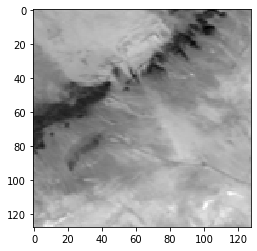

In [39]:
print(img.shape)
plt.imshow(img, cmap='gray')

In [137]:
# TODO: UPSAMPLE (bicubic interpolation) IMAGES BEFORE RETURNING IN THE __getitem__() METHOD

class TrainNIRDataset(torch.utils.data.Dataset):
    """Some Satellite Shit."""

    def __init__(self, transform=None):
        self.transform = transform
        
    def __len__(self):
        return 566

    def __getitem__(self, idx):
        start_index = 594
        img_set_num = start_index + idx
        img_set_filename = '0' + str(img_set_num) if img_set_num < 1000 else str(img_set_num)
        imgs_path = 'data/train/NIR/imgset' + str(img_set_filename)
        
        num_LR = len([name for name in os.listdir(imgs_path)]) // 2 - 1
        LR_imgs = np.concatenate([
            np.array(Image.open(imgs_path + '/LR{}.png'.format(('00' + str(val)) if val < 10 else ('0' + str(val))))).reshape(1, 128, 128) 
                     for val in range(num_LR)])
        HR_img = np.array(Image.open(imgs_path + '/HR.png'))
        sample = {'LR': LR_imgs, 'HR': HR_img}
        return sample
    
class TestNIRDataset(torch.utils.data.Dataset):
    """Some Satellite Shit."""

    def __init__(self, transform=None):
        self.transform = transform
        
    def __len__(self):
        return 144

    def __getitem__(self, idx):
        
        start_index = 1306
        img_set_num = start_index + idx
        img_set_filename = '0' + str(img_set_num) if img_set_num < 1000 else str(img_set_num)
        imgs_path = 'data/test/NIR/imgset' + str(img_set_filename)

        num_LR = len([name for name in os.listdir(imgs_path)]) // 2
        LR_imgs = np.concatenate([
            np.array(Image.open(imgs_path + '/LR{}.png'.format(('00' + str(val)) if val < 10 else ('0' + str(val))))).reshape(1, 128, 128) 
                        for val in range(num_LR)])
        sample = {'LR': LR_imgs}
        return sample
    
class TrainREDDataset(torch.utils.data.Dataset):
    """Some Satellite Shit."""

    def __init__(self, transform=None):
        self.transform = transform
        
    def __len__(self):
        return 594

    def __getitem__(self, idx):
        
        start_index = 0
        img_set_num = start_index + idx
        img_set_filename = str(img_set_num)
        while len(img_set_filename) < 4:
            img_set_filename = '0' + img_set_filename
        imgs_path = 'data/train/RED/imgset' + str(img_set_filename)

        num_LR = len([name for name in os.listdir(imgs_path)]) // 2 - 1
        LR_imgs = np.concatenate([
            np.array(Image.open(imgs_path + '/LR{}.png'.format(('00' + str(val)) if val < 10 else ('0' + str(val))))).reshape(1, 128, 128) 
                        for val in range(num_LR)])
        HR_img = np.array(Image.open(imgs_path + '/HR.png'))
        sample = {'LR': LR_imgs, 'HR': HR_img}
        return sample

    
class TestREDDataset(torch.utils.data.Dataset):
    """Some Satellite Shit."""

    def __init__(self, transform=None):
        self.transform = transform
        
    def __len__(self):
        return 146

    def __getitem__(self, idx):
        
        start_index = 1160
        img_set_num = start_index + idx
        img_set_filename = '0' + str(img_set_num) if img_set_num < 1000 else str(img_set_num)
        imgs_path = 'data/test/RED/imgset' + str(img_set_filename)

        num_LR = len([name for name in os.listdir(imgs_path)]) // 2
        LR_imgs = np.concatenate([
            np.array(Image.open(imgs_path + '/LR{}.png'.format(('00' + str(val)) if val < 10 else ('0' + str(val))))).reshape(1, 128, 128) 
                        for val in range(num_LR)])
        sample = {'LR': LR_imgs}
        return sample
    

In [143]:
oof = TrainNIRDataset()

In [145]:
print(oof[0]['HR'].shape)

(384, 384)


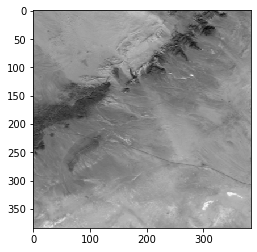

In [146]:
plt.imshow(oof[0]['HR'], cmap='gray')

In [100]:
# oof2 = torch.utils.data.DataLoader(oof, batch_size=4, shuffle=False)

In [101]:
# print(next(iter(oof2)))